<a href="https://colab.research.google.com/github/JessicaMishra/leaf-train/blob/master/leaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [2]:
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [3]:
!kaggle datasets download -d rohit9086/leaves

 94% 191M/204M [00:03<00:00, 54.7MB/s]
100% 204M/204M [00:03<00:00, 68.4MB/s]


In [ ]:
!unzip "*.zip"

In [ ]:
os.listdir("dataset/train")

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [7]:
bs=64

In [8]:
path=""
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("dataset/train"), valid_pct=0.2, bs=64, size=224)

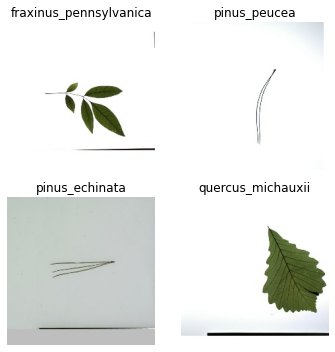

In [9]:
data.show_batch(rows=2, figsize=(5,5))

In [ ]:
print(data.classes)
len(data.classes)

['abies_concolor', 'abies_nordmanniana', 'acer_campestre', 'acer_ginnala', 'acer_griseum', 'acer_negundo', 'acer_palmatum', 'acer_pensylvanicum', 'acer_platanoides', 'acer_pseudoplatanus', 'acer_rubrum', 'acer_saccharinum', 'acer_saccharum', 'aesculus_flava', 'aesculus_glabra', 'aesculus_hippocastamon', 'aesculus_pavi', 'ailanthus_altissima', 'albizia_julibrissin', 'amelanchier_arborea', 'amelanchier_canadensis', 'amelanchier_laevis', 'asimina_triloba', 'betula_alleghaniensis', 'betula_jacqemontii', 'betula_lenta', 'betula_nigra', 'betula_populifolia', 'broussonettia_papyrifera', 'carpinus_betulus', 'carpinus_caroliniana', 'carya_cordiformis', 'carya_glabra', 'carya_ovata', 'carya_tomentosa', 'castanea_dentata', 'catalpa_bignonioides', 'catalpa_speciosa', 'cedrus_atlantica', 'cedrus_deodara', 'cedrus_libani', 'celtis_occidentalis', 'celtis_tenuifolia', 'cercidiphyllum_japonicum', 'cercis_canadensis', 'chamaecyparis_pisifera', 'chamaecyparis_thyoides', 'chionanthus_retusus', 'chionanthu

185

In [10]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [11]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,2.059407,1.146298,0.685500,02:41
1,1.074264,0.600352,0.819158,02:42
2,0.673996,0.407347,0.875861,02:43
3,0.413946,0.274753,0.918996,02:43
4,0.213505,0.222603,0.932564,02:42
5,0.152481,0.201855,0.935601,02:42


In [13]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.875589,0.781954,0.779060,03:45
1,0.212079,0.151200,0.952612,03:43


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


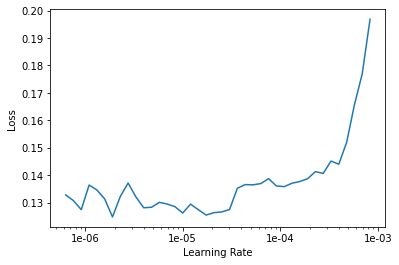

In [19]:
learn.unfreeze() # must be done before calling lr_find
learn.lr_find()
learn.recorder.plot()

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

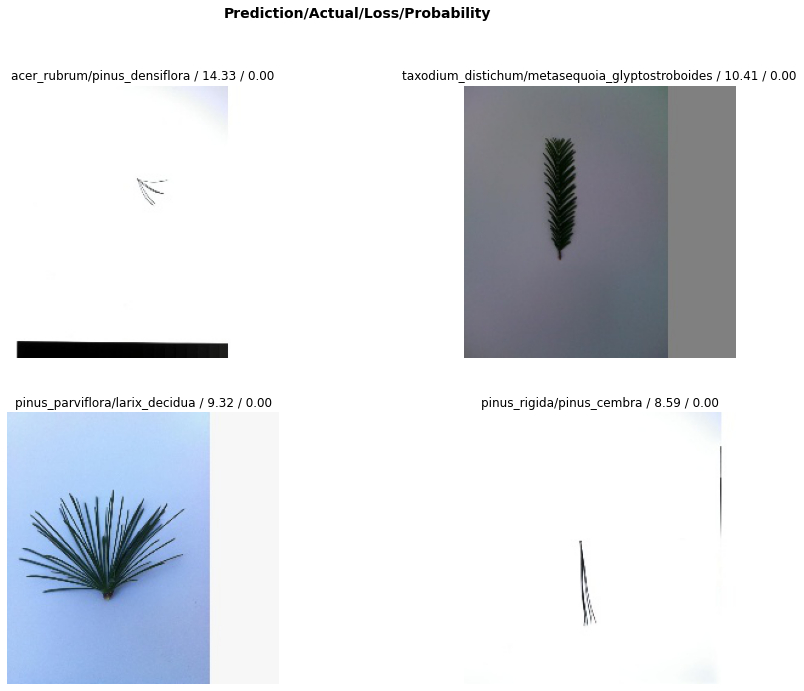

In [22]:
interp.plot_top_losses(4, figsize=(15,11))

In [15]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [23]:
os.makedirs("/content/drive/My Drive/geeksman_projects/leaf_classification",exist_ok=True)

In [24]:
my_dir="/content/drive/My Drive/geeksman_projects/leaf_classification"

In [18]:
learn.save(my_dir+"/Stage-1")

In [1]:
learn.export(my_dir+"/export.pkl")

NameError: ignored